# EEG Net Accuracy

In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

import tensorflow as tf

from utils import get_data

In [2]:
CLASS_DICT = {
    0: "Left",
    1: "Right"
}

SPLIT = 'split9'

In [3]:
model = tf.keras.saving.load_model(f'models/eegNet/motor_imagery/{SPLIT}/trained_model.h5')

train_ds, val_ds, test_ds, class_weights, max_len = get_data(dataset="motor_imagery", batch_size=64)

2024-07-29 21:58:56.338690: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-07-29 21:58:56.338713: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-07-29 21:58:56.338718: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-07-29 21:58:56.338778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-29 21:58:56.338810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Load training set:
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s01.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s02.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s03.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s04.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s05.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s06.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s07.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s08.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s09.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s10.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s11.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s12.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s14.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s15.npz ...
Loading ../SESM/datasets/eeg/motor_imagery/prepared/s17.npz ...
Loading ../SESM/datas

In [4]:
# Extract data and labels from the dataset
test_data = []
test_labels = []
for x, y in test_ds:
    test_data.append(x)
    test_labels.append(y)

# Concatenate the dataset batches into NumPy arrays
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = ((predictions > 0.5)+0).ravel()

os.makedirs('test_outputs', exist_ok=True)
os.makedirs('test_outputs/motor_imagery', exist_ok=True)
os.makedirs(f'test_outputs/motor_imagery/{SPLIT}', exist_ok=True)

with open(f'test_outputs/motor_imagery/{SPLIT}/y_true_test.pkl','wb') as f:
    pickle.dump(test_labels, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(f'test_outputs/motor_imagery/{SPLIT}/y_pred_test.pkl','wb') as f:
    pickle.dump(predicted_labels, f, protocol=pickle.HIGHEST_PROTOCOL)


13/32 [===========>..................] - ETA: 0s

2024-07-29 21:59:00.036340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 0s 5ms/step


2024-07-29 21:59:01.142495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Test Loss: 0.5526
Test Accuracy: 73.60%
32/32 [==============================] - 0s 5ms/step
Test Precision: 73.60%
Test Recall: 73.60%


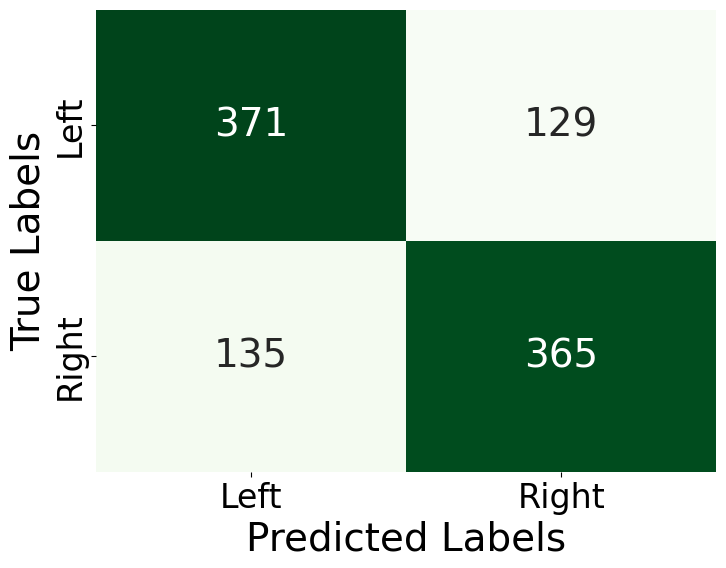

              precision    recall  f1-score   support

        Left       0.73      0.74      0.74       500
       Right       0.74      0.73      0.73       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



Accuracy for Left: 74.20%
Accuracy for Right: 73.00%


In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = ((predictions > 0.5)+0).ravel()

precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')
print(f'Test Precision: {precision*100:.2f}%')
print(f'Test Recall: {recall*100:.2f}%')

# Create a confusion matrix
confusion = confusion_matrix(test_labels, predicted_labels)

class_names = CLASS_DICT.values()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={"fontsize":28})
plt.xlabel('Predicted Labels', fontsize=28)
plt.gca().set_xticklabels(class_names, fontsize=24)
plt.ylabel('True Labels', fontsize=28)
plt.gca().set_yticklabels(class_names, fontsize=24)
plt.show()

# Generate a classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(report)

# Calculate class-wise accuracy
class_accuracy = confusion.diagonal()/confusion.sum(axis=1)

print("\n")
# Print class-wise accuracy
for i, class_name in enumerate(class_names):
    print(f'Accuracy for {class_name}: {class_accuracy[i]*100:.2f}%')

plt.show()

# Calculate main results

In [90]:
class_names = CLASS_DICT.values()

# Load the experiments
splits = [f'split{n}' for n in range(1,10)]
split_results = []
classwise_accuracies = []

for split in splits:

    with open(f'test_outputs/motor_imagery/{split}/y_true_test.pkl','rb') as f:
        y_true = pickle.load(f)
    
    with open(f'test_outputs/motor_imagery/{split}/y_pred_test.pkl','rb') as f:
        y_pred = pickle.load(f)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")

    row = {
        "experiment": split,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall
    }
    split_results.append(row)

    # Create a confusion matrix
    confusion = confusion_matrix(y_true, y_pred)
    class_accuracy = confusion.diagonal()/confusion.sum(axis=1)

    classwise_row = { class_name: class_accuracy[i] for i, class_name in enumerate(class_names) }
    classwise_row["experiment"] = split
    classwise_accuracies.append(classwise_row)

In [91]:
results_df = pd.DataFrame(split_results)
classwise_results = pd.DataFrame(classwise_accuracies)

display(results_df)
display(classwise_results)

,experiment,accuracy,precision,recall
0,split1,0.679,0.682899,0.679
1,split2,0.654,0.654022,0.654
2,split3,0.663,0.664714,0.663
3,split4,0.652,0.657569,0.652
4,split5,0.673,0.673250,0.673
5,split6,0.661,0.663433,0.661
6,split7,0.652,0.652061,0.652
7,split8,0.671,0.671001,0.671
8,split9,0.642,0.642057,0.642


,Left,Right,experiment
0,0.752,0.606,split1
1,0.648,0.660,split2
2,0.714,0.612,split3
3,0.746,0.558,split4
4,0.692,0.654,split5
5,0.722,0.600,split6
6,0.642,0.662,split7
7,0.672,0.670,split8
8,0.652,0.632,split9


In [92]:
# Calculate mean and standard deviation
agg_mean = results_df.loc[:,["accuracy","precision", "recall"]].mean()
agg_std = results_df.loc[:,["accuracy","precision", "recall"]].std()

# Create a new dataframe for aggregation
agg_df = pd.DataFrame({'mean': agg_mean, 'std': agg_std})
display(agg_df)

,mean,std
accuracy,0.660778,0.011956
precision,0.662334,0.012412
recall,0.660778,0.011956


In [93]:
# Calculate mean and standard deviation
classwise_agg_mean = classwise_results.loc[:,list(class_names)].mean()
classwise_agg_std = classwise_results.loc[:,list(class_names)].std()

# Create a new dataframe for classwise_aggregation
classwise_agg_df = pd.DataFrame({'mean': classwise_agg_mean, 'std': classwise_agg_std})
display(classwise_agg_df)

,mean,std
Left,0.693333,0.042308
Right,0.628222,0.037181


In [6]:
y_trues = []
y_preds = []

for split in [f'split{n}' for n in range(1,10)]:

    with open(f'test_outputs/motor_imagery/{split}/y_true_test.pkl','rb') as f:
        y_true = pickle.load(f)
    
    with open(f'test_outputs/motor_imagery/{split}/y_pred_test.pkl','rb') as f:
        y_pred = pickle.load(f)
    
    y_trues.append(y_true)
    y_preds.append(y_pred)

y_true = np.concatenate(y_trues)
y_pred = np.concatenate(y_preds)

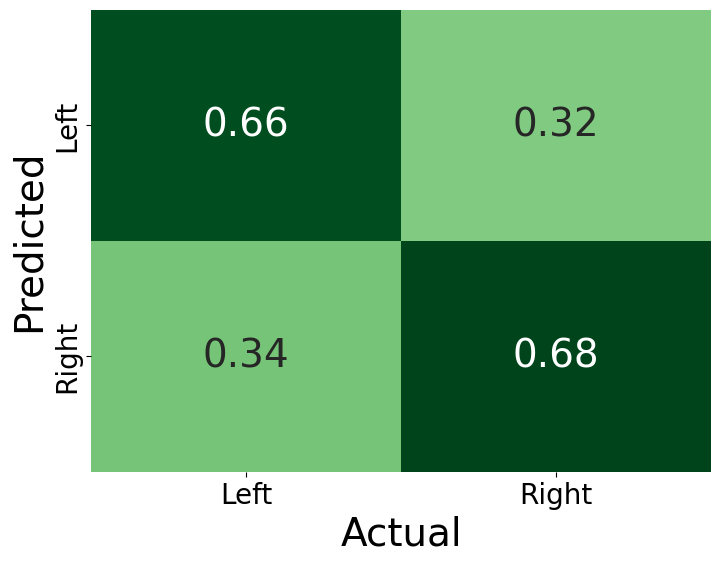

In [7]:
C = confusion_matrix(y_true, y_pred)
C = C / C.astype(float).sum(axis=0)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    C,
    vmin=0,
    annot=True,
    annot_kws={"fontsize":28},
    cmap='Greens',
    cbar=False
)
ax.set_xticklabels(CLASS_DICT.values(), fontsize=20)
ax.set_yticklabels(CLASS_DICT.values(), fontsize=20)
ax.set_xlabel("Actual", fontsize=28)
ax.set_ylabel("Predicted", fontsize=28)
plt.show()